In [ ]:
!pip install --upgrade -q kaggle

!mkdir /root/.kaggle
import json
token = {
    "username": "auvzhcet",
    "key": "3d59cbe6e491d2904ce4e1b0766d65d4"
}

with open('/root/.kaggle/kaggle.json', 'w') as config_file:
    json.dump(token, config_file)
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d tolgadincer/labeled-chest-xray-images

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/tolgadincer/labeled-chest-xray-images
License(s): other
labeled-chest-xray-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zipref=zipfile.ZipFile("/content/labeled-chest-xray-images.zip",'r')
zipref.extractall()
zipref.close()

In [ ]:
train_dir="/content/chest_xray/train/"
test_dir="/content/chest_xray/test/"

In [ ]:
# /content/chest_xray/test/NORMAL

(696, 1056)


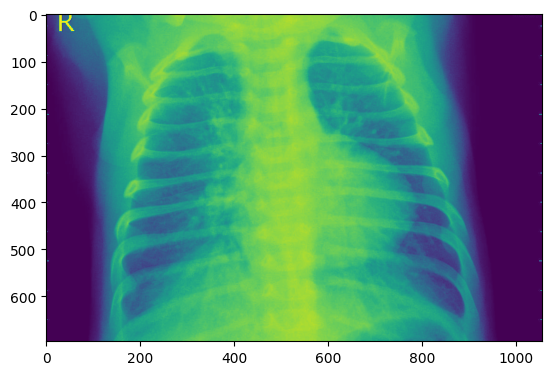

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

fpath=r'/content/chest_xray/train/PNEUMONIA/BACTERIA-1027194-0001.jpeg'
img=plt.imread(fpath)
print (img.shape)
imshow(img)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
def view_random_image(target_dir , target_class):

  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder) , 1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"image shape : {img.shape}")

  return img

['NORMAL-1150393-0001.jpeg']
image shape : (1464, 1600)


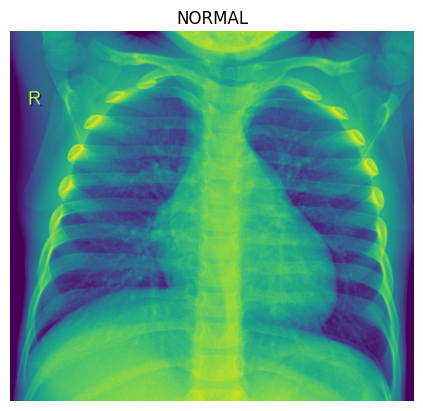

In [ ]:
img = view_random_image(target_dir = train_dir ,
                        target_class = "NORMAL")

['BACTERIA-8849094-0002.jpeg']
image shape : (672, 864)


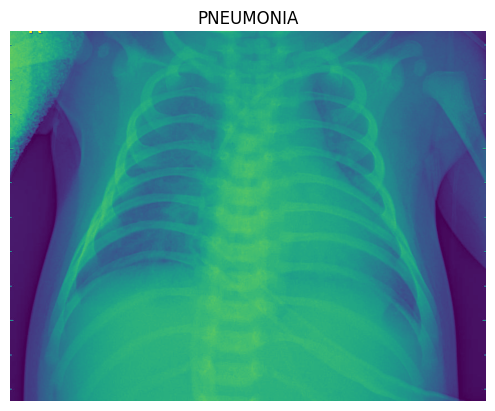

In [ ]:
img = view_random_image(target_dir = train_dir ,
                        target_class = "PNEUMONIA")

In [ ]:
# 167/255 = -- 0 to 1 range ... 0 to 255

# 200x200 --- 100 x 100 ----121 x 200 ---> 60 x 50 --> 120x 100
# 0.45 0.5> ---> 0
#  annotation ---> labeling
#  aurgumentaion --> data set size inc --> diversity increase
# data loading --> preporocessing / normalization + rshaping+ noise ---> model training---> post processing --> reults

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(rescale = 1/255.)
test_datagen= ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (320,320),
                                               batch_size = 32,
                                               class_mode = "binary",)
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size = (320,320),
                                               batch_size = 32,
                                               class_mode = "binary",)

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
model_xray_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,activation='relu',input_shape=(320,320,3)),
    tf.keras.layers.MaxPool2D(pool_size = 2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2,padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])


model_xray_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model_xray_1.summary()
history_xray_1 = model_xray_1.fit(train_data, epochs=5) # calbacks == save best model 21 st ... last model --- 25th

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 318, 318, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 159, 159, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 157, 157, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 78, 78, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 60840)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │          60,841 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,031 (242.31 KB)

 Trainable params: 62,031 (242.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 16/164 ━━━━━━━━━━━━━━━━━━━━ 1:35 648ms/step - accuracy: 0.6648 - loss: 0.7591

KeyboardInterrupt: 

In [ ]:
model_xray_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,activation='relu',input_shape=(320,320,3)),
    tf.keras.layers.MaxPool2D(pool_size = 2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2,padding="valid"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])


model_xray_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model_xray_1.summary()
history_xray_1 = model_xray_1.fit(train_data, epochs=5)
# calbacks == save best model 21 st ... last model --- 25th
# state of the art model SOTA model --> VGG , RESNET , Densenet --- Transformers
# alexnet,

In [ ]:
# aurgrumentation
# anaotation

In [ ]:
# # Show original image and augmented image
# import random
# import matplotlib.pyplot as plt

# random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
# plt.imshow(images[random_number])
# plt.title(f"Original image")
# plt.axis(False)
# plt.figure()
# plt.imshow(augmented_images[random_number])
# plt.title(f"Augmented image")
# plt.axis(False);

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                  rotation_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True
                                  )

train_data_augmented= train_datagen_augmented.flow_from_directory(train_dir,
                                               target_size = (320,320),
                                               batch_size = 32,
                                               class_mode = "binary",)

test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size = (320,320),
                                               batch_size = 32,
                                               class_mode = "binary",)

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# Get data batch samples
# images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.__next__() # Note: labels aren't augmented, they stay the same

In [ ]:
augmented_images.shape

(32, 320, 320, 3)

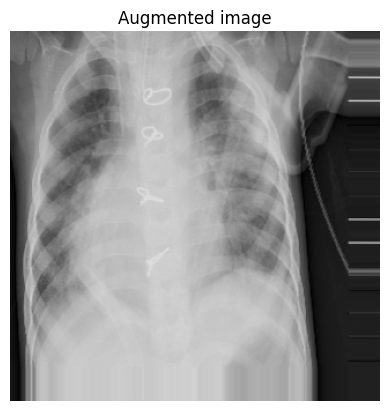

In [ ]:
plt.imshow(augmented_images[7])
plt.title(f"Augmented image")
plt.axis(False);

In [ ]:
model_xray_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,activation='relu',input_shape=(320,320,3)),
    tf.keras.layers.MaxPool2D(pool_size = 2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2,padding="valid"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])


model_xray_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model_xray_1.summary()
history_xray_1 = model_xray_1.fit(train_data_augmented, epochs=5)

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)                   │ (None, 318, 318, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 159, 159, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 157, 157, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 78, 78, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 78, 78, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 60840)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │          60,841 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,031 (242.31 KB)

 Trainable params: 62,031 (242.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 165s 954ms/step - accuracy: 0.7738 - loss: 0.5086
Epoch 2/5
 10/164 ━━━━━━━━━━━━━━━━━━━━ 2:39 1s/step - accuracy: 0.8753 - loss: 0.3200

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  # val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  # val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  # plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  # plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
plot_loss_curves(history_xray_1)

NameError: name 'history_xray_1' is not defined

In [ ]:
def load_prep(filename,img_shape=180):

    img=tf.io.read_file(filename)
    img=tf.image.decode_image(img,channels=3)
    img=tf.image.resize(img,size=[img_shape,img_shape])

    img=img/255.
    return img

def pred_and_plot(model, filename, class_names):
  import numpy as np
  img = load_prep(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  result=pred.argmax()
  pred_class = class_names[result]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
pred_and_plot(model3, "COVID-1061.png", class_names)

In [ ]:
pred_and_plot(model3, "COVID-1140.png", class_names)

In [ ]:
pred_and_plot(model3, "COVID-1680.png", class_names)

In [ ]:
pred_and_plot(model3, "Normal-100.png", class_names)

In [ ]:
pred_and_plot(model3, "Normal-1004.png", class_names)

In [ ]:
pred_and_plot(model3,"Normal-5267.png.1", class_names)

In [ ]:
pred_and_plot(model3,"Normal-524.png", class_names)

In [ ]:
pred_and_plot(model3, "Viral Pneumonia-1095.png", class_names)

In [ ]:
pred_and_plot(model3, "Viral Pneumonia-1120.png", class_names)

In [ ]:
pred_and_plot(model3, "Viral Pneumonia-1148.png", class_names)